# News Sentimental Analysis


### Import Python Library and Data

First we will import the required Python library and display the data in the dataset.

In [1]:
# Import Python library
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

I will analyze the headline news data by using Natural Language Preprocessing (NLP). First I will display the headlines data.

In [2]:
# Display the first five row in the headlines data
raw = pd.read_csv('india-news-headlines.csv')
raw.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [3]:
# Display the last five row in the headlines data
raw.tail()

,publish_date,headline_category,headline_text
3650965,20220331,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650966,20220331,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,20220331,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650968,20220331,city.erode,Tamil Nadu sees marginal rise of Covid cases w...
3650969,20220331,city.salem,Tamil Nadu sees marginal rise of Covid cases w...


In [4]:
# Copy the headline text column into a new data frame and display it
raw_df = raw[['headline_text']].copy()
raw_df

,headline_text
0,Status quo will not be disturbed at Ayodhya; s...
1,Fissures in Hurriyat over Pak visit
2,America's unwanted heading for India?
3,For bigwigs; it is destination Goa
4,Extra buses to clear tourist traffic
...,...
3650965,J&K sacks 2 cops; 3 other employees over terro...
3650966,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,As Covid-19 cases drop to nil in southern dist...
3650968,Tamil Nadu sees marginal rise of Covid cases w...


In [5]:
# Display the first five row in the headline column
raw_df.head()

,headline_text
0,Status quo will not be disturbed at Ayodhya; s...
1,Fissures in Hurriyat over Pak visit
2,America's unwanted heading for India?
3,For bigwigs; it is destination Goa
4,Extra buses to clear tourist traffic


Next, we will check does the headline column contains a missing value.

In [6]:
# Check for missing value
raw_df.isnull().sum()

headline_text    0
dtype: int64

We can see that headline text columns does not contains any missing value.

In [7]:
# Display the first five rows in the headline columns
raw_df = raw_df.iloc[:15000,:]
raw_df.head()

,headline_text
0,Status quo will not be disturbed at Ayodhya; s...
1,Fissures in Hurriyat over Pak visit
2,America's unwanted heading for India?
3,For bigwigs; it is destination Goa
4,Extra buses to clear tourist traffic


In [8]:
# Display the shape of the headline column
# Display data shape
print('Rows: {}'.format(raw_df.shape[0]))
print('Columns: {}'.format(raw_df.shape[1]))

Rows: 15000
Columns: 1


After observing the headline news data, I will import the natural language library in Python.

In [9]:
# Import NLP library
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [10]:
# Import vader lexicon and stopwords
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dhyan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dhyan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Lets add the necessary score in sentimental analysis to evaluate the headline.

In [11]:
# Evaluate the headline category into three types of tendency value: positive, neutral, and negative
sid = SentimentIntensityAnalyzer()
result = []
for line in raw_df['headline_text']:
    scores = sid.polarity_scores(line)
    scores['headline']=line
    result.append(scores)
rev = pd.DataFrame(result)
rev.head()

,neg,neu,pos,compound,headline
0,0.000,0.805,0.195,0.2924,Status quo will not be disturbed at Ayodhya; s...
1,0.000,1.000,0.000,0.0000,Fissures in Hurriyat over Pak visit
2,0.322,0.678,0.000,-0.2263,America's unwanted heading for India?
3,0.000,1.000,0.000,0.0000,For bigwigs; it is destination Goa
4,0.000,0.658,0.342,0.3818,Extra buses to clear tourist traffic


In [12]:
# Display the shape of the new data frame
# Display data shape
print('Rows: {}'.format(rev.shape[0]))
print('Columns: {}'.format(rev.shape[1]))

Rows: 15000
Columns: 5


In sentimental analysis, we will add a sentiment score to evaluate the headline data.

In [13]:
# Add ratings score
ratings = []
for row in rev['compound']:
    if row >= 0.05 :
        ratings.append(1)
    elif row <= - 0.05 :
        ratings.append(-1)
    else :
        ratings.append(0)

rev['scores'] = ratings
rev.head()

,neg,neu,pos,compound,headline,scores
0,0.000,0.805,0.195,0.2924,Status quo will not be disturbed at Ayodhya; s...,1
1,0.000,1.000,0.000,0.0000,Fissures in Hurriyat over Pak visit,0
2,0.322,0.678,0.000,-0.2263,America's unwanted heading for India?,-1
3,0.000,1.000,0.000,0.0000,For bigwigs; it is destination Goa,0
4,0.000,0.658,0.342,0.3818,Extra buses to clear tourist traffic,1


In the subsequent steps, we will count the value in ratings column before and after normalization.

In [14]:
# Before normalization
rev['scores'].value_counts()

 0    8145
-1    3883
 1    2972
Name: scores, dtype: int64

In [15]:
# After normalization
a = rev['scores'].value_counts(normalize=True)*100
a

 0    54.300000
-1    25.886667
 1    19.813333
Name: scores, dtype: float64

Lets count the sentiment distibution.

Text(0.5, 0, '')

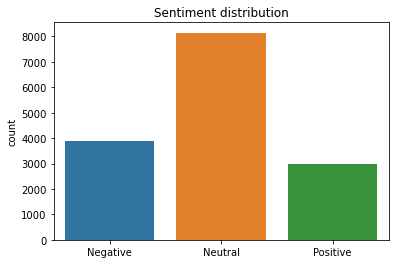

In [16]:
# Display sentimental value count.
import seaborn as sns
f = sns.countplot(x='scores', data=rev)
f.set_title("Sentiment distribution")
f.set_xticklabels(['Negative', 'Neutral','Positive'])
plt.xlabel("")

We can see that the headline text mostly has neutral sentiment while less than a quarter of the headline has positive sentiment. For the negative sentiment headline, we can see that less than one third of the headlines has this characteristics. Lets create a word cloud to see which headline is more often to see in the headline news data.

<Figure size 864x576 with 0 Axes>

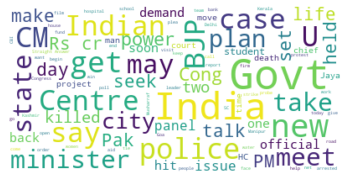

In [17]:
# Build a word cloud
from wordcloud import WordCloud
from nltk.corpus import stopwords

text = " ".join(review for review in rev.headline)
plt.figure(figsize=(12,8))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stopwords.words("english")).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

From the word cloud above, we can see that government and India headline news are the most often headline that contains in the headline data.

In [18]:
# Convert headline value columns to a lis
z = rev['headline'].values.tolist()
z[0:5]

['Status quo will not be disturbed at Ayodhya; says Vajpayee',
 'Fissures in Hurriyat over Pak visit',
 "America's unwanted heading for India?",
 'For bigwigs; it is destination Goa',
 'Extra buses to clear tourist traffic']

Lets define our stopwords and tokenizer.

In [19]:
# Define stopwords and tokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
tokenizer = RegexpTokenizer(r'\w+')

In [20]:
# Define text processing functions
def process_text(z):
    tokens = []
    for line in z:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

Then, we will display the positive, negative, and neutral headlines respectively.

In [21]:
# Display positive headlines
pos_lines = list(rev[rev.scores == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('govt', 125),
 ('straight', 94),
 ('answers', 86),
 ('india', 84),
 ('relief', 60),
 ('top', 59),
 ('security', 57),
 ('help', 53),
 ('rs', 49),
 ('peace', 48),
 ('best', 44),
 ('us', 44),
 ('good', 43),
 ('new', 43),
 ('support', 40),
 ('indian', 39),
 ('special', 39),
 ('cm', 38),
 ('centre', 38),
 ('party', 36)]

In [22]:
# Display negative headlines
neg_lines = list(rev[rev.scores == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('govt', 162),
 ('killed', 148),
 ('police', 99),
 ('case', 89),
 ('death', 87),
 ('india', 81),
 ('murder', 71),
 ('strike', 66),
 ('dead', 66),
 ('arrested', 61),
 ('held', 60),
 ('bjp', 58),
 ('attack', 58),
 ('accused', 56),
 ('3', 55),
 ('phoolan', 55),
 ('protest', 54),
 ('says', 53),
 ('ban', 52),
 ('fire', 48)]

In [23]:
# Display the neutral headlines
neu_lines = list(rev[rev.scores == 0].headline)

neu_tokens = process_text(neu_lines)
neu_freq = nltk.FreqDist(neu_tokens)

neu_freq.most_common(20)

[('govt', 297),
 ('india', 262),
 ('new', 194),
 ('rs', 135),
 ('police', 124),
 ('bjp', 114),
 ('may', 113),
 ('us', 109),
 ('centre', 101),
 ('meet', 100),
 ('state', 97),
 ('cm', 96),
 ('case', 93),
 ('get', 91),
 ('hc', 91),
 ('indian', 90),
 ('power', 88),
 ('cong', 86),
 ('pak', 84),
 ('chief', 84)]

## From the output above, we can see that the top headlines for each categories is government headlines.